# Introduction

In the following notebook, I will be preprocessing our raw data and engineering new features to build a simple prediction model.

**Import Libraries**

In [68]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import plotly.express as px
import yaml
import os

**Set Notebook Preferences**

In [69]:
#Set pandas preferences
pd.set_option('display.max_columns', 100)

#Set visualization preferences
plt.style.use('ggplot')

fontdict= {'title_fontsize':16,
           'label_fontsize':12}

**Read-in Data**

In [70]:
#Change directory to my_config.yaml
os.chdir('C:/Users/kishe/Documents/Data Science/Projects/Python/In Progress/Car_Price_Prediction')

#Read yaml file
from box import Box

with open('my_config.yaml') as file:
    yaml_data= Box(yaml.safe_load(file))

#Read in raw data
raw_data= pd.read_csv(yaml_data.base.path.data)

## View Visualizations from EDA

In [71]:
#Set path to figures file to load images
path = 'C:/Users/kishe/Documents/Data Science/Projects/Python/In Progress/Car_Price_Prediction/Reports/Figures/'

#Read in visualizations


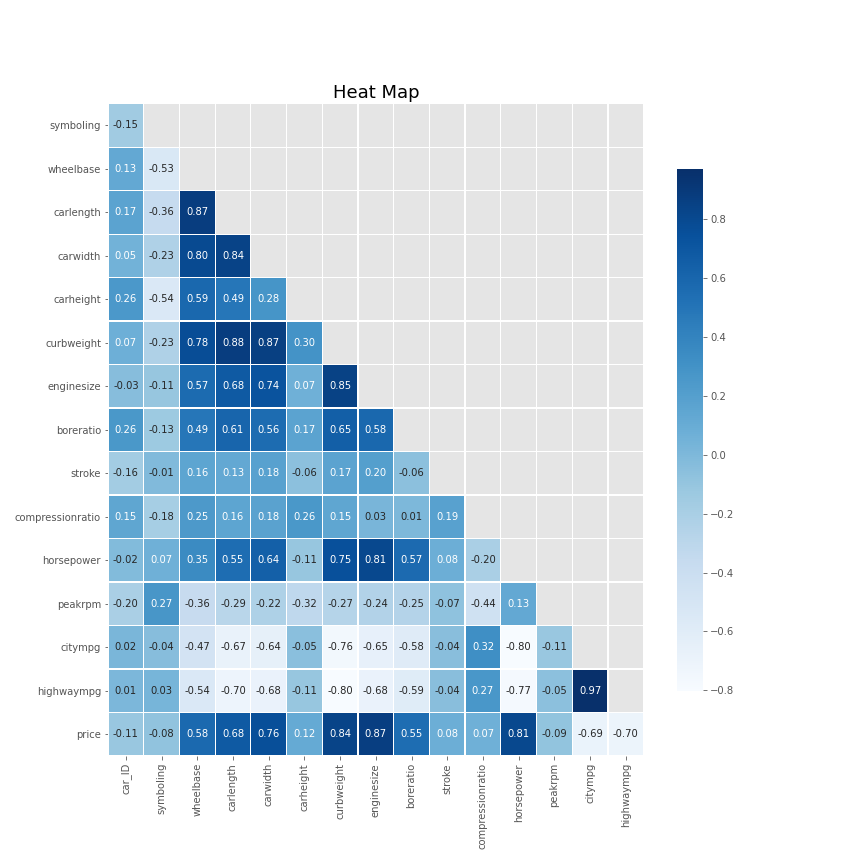

In [72]:
#Import library
from IPython.display import Image

# Load visualizations from local storage
Image(filename = path + "RawDataHeatmap.png", width = 600, height = 300)

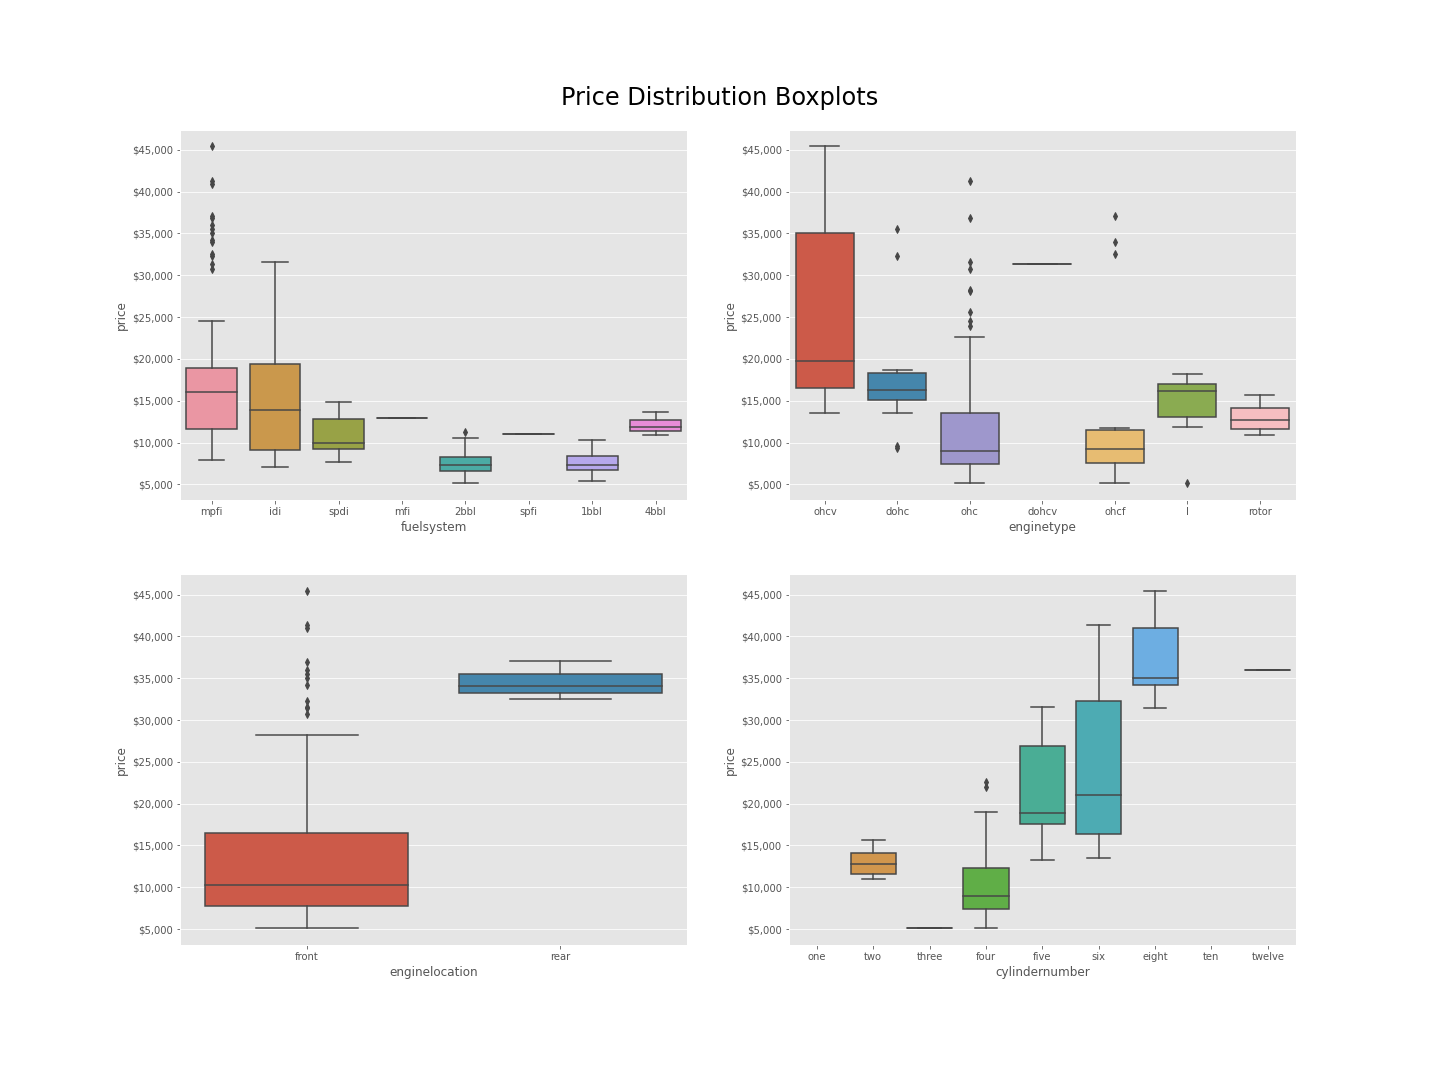

In [73]:
Image(filename = path + "RawDataBoxplot.png", width = 600, height = 500)

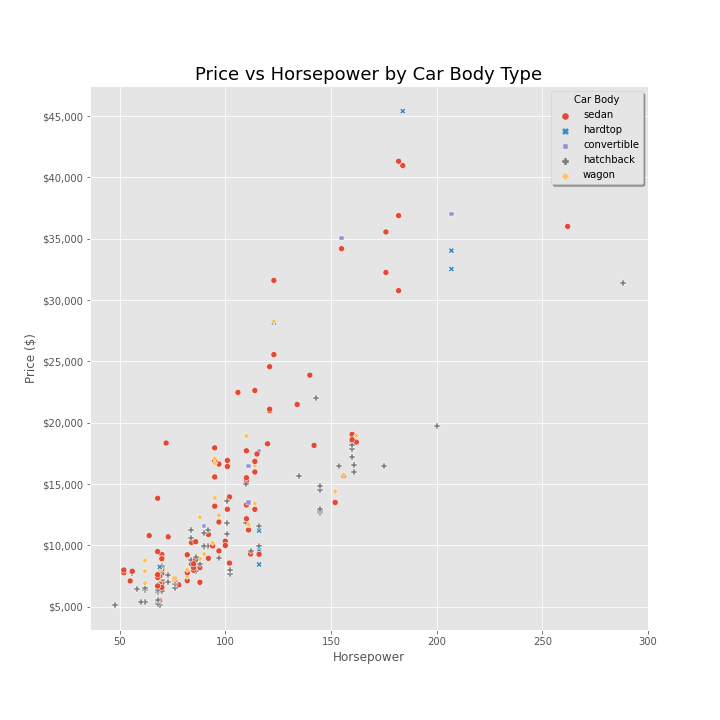

In [74]:
Image(filename = path + "RawDataScatterplot.png", width = 600, height = 600)

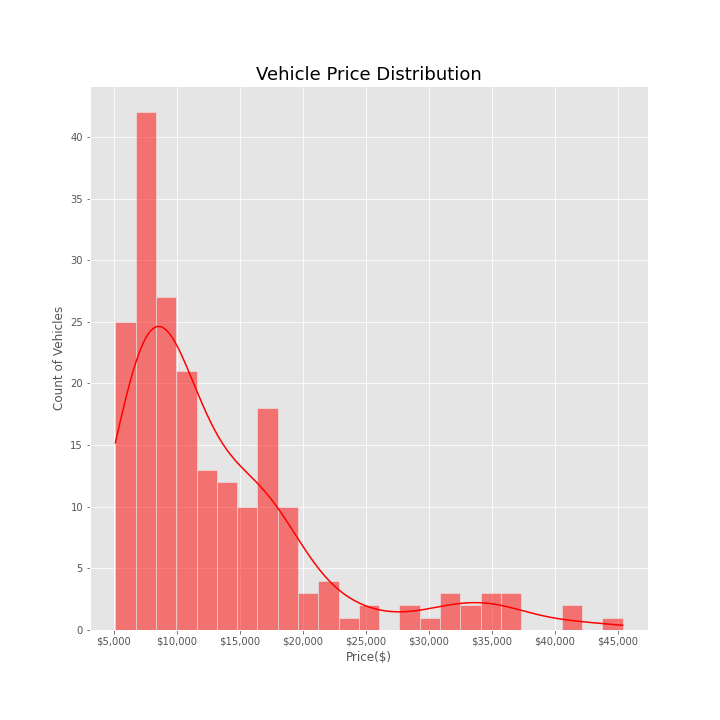

In [75]:
Image(filename = path + "RawDataPriceDistribution.png", width = 600, height = 300)

# Data Cleaning

**Remove cols of no particular use or interest**

In [76]:
raw_data.drop(['car_ID', 'CarName'], axis= 1, inplace= True)

In [77]:
raw_data.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,0,gas,std,two,sedan,rwd,front,102.0,191.7,70.6,47.8,3950,ohcv,twelve,326,mpfi,3.54,2.76,11.5,262,5000,13,17,36000.0
1,0,gas,std,four,sedan,rwd,front,120.9,208.1,71.7,56.7,3900,ohcv,eight,308,mpfi,3.80,3.35,8.0,184,4500,14,16,40960.0
2,1,gas,std,two,hardtop,rwd,front,112.0,199.2,72.0,55.4,3715,ohcv,eight,304,mpfi,3.80,3.35,8.0,184,4500,14,16,45400.0
3,0,gas,std,four,sedan,rwd,front,113.0,199.6,69.6,52.8,4066,dohc,six,258,mpfi,3.63,4.17,8.1,176,4750,15,19,32250.0
4,0,gas,std,four,sedan,rwd,front,113.0,199.6,69.6,52.8,4066,dohc,six,258,mpfi,3.63,4.17,8.1,176,4750,15,19,35550.0


## Testing

In [78]:
#Import modules
import src
from src.Features.feature_engineering import Tests

**Check for Skew**

In [79]:
#Init tests object using raw data
raw_tests = Tests(raw_data)

#View Skew
raw_tests.skew_measurement()

symboling           0.211072
wheelbase           1.050214
carlength           0.155954
carwidth            0.904003
carheight           0.063123
curbweight          0.681398
enginesize          1.947655
boreratio           0.020156
stroke             -0.689705
compressionratio    2.610862
horsepower          1.405310
peakrpm             0.075159
citympg             0.663704
highwaympg          0.539997
price               1.777678
dtype: float64

**Calculate VIF Score: Check for Multicollinearity**

In [80]:
#Import modules
import src
from src.Features.feature_engineering import Tests

#Reload - Remove later
import importlib
importlib.reload(src.Features.feature_engineering)
from src.Features.feature_engineering import Tests


#Init tests object using raw data
raw_tests = Tests(raw_data)

#View VIF scores
raw_tests.variance_inflation_score()

const               5235.488107
citympg               28.197217
highwaympg            24.552628
curbweight            16.514662
carlength              9.567789
enginesize             9.168595
wheelbase              8.521885
horsepower             8.487845
price                  6.750775
carwidth               5.794022
compressionratio       2.343710
carheight              2.316587
peakrpm                2.188544
boreratio              2.111783
symboling              1.858842
stroke                 1.293605
dtype: float64

In [81]:
#Remove citympg, curbweight
raw_tests.data= raw_tests.data.drop(['citympg','curbweight'], axis= 1)

In [82]:
#Rerun VIF test
raw_tests.variance_inflation_score()

#We'll keep these features for now

const               5105.028678
wheelbase              8.060968
enginesize             8.053895
carlength              8.049977
horsepower             7.205340
price                  6.623045
carwidth               5.680159
highwaympg             4.504245
carheight              2.306072
peakrpm                2.102526
boreratio              2.093876
compressionratio       1.849207
symboling              1.818723
stroke                 1.267800
dtype: float64

# Feature Engineering

### Target

**Check for normality and apply transformation if needed**

In [83]:
from src.Features.feature_engineering import Transformations

#Init Transformations class
og_data = Transformations(raw_data)

#Apply shapiro-wilks test on target
#og_data.shapiro_wilks('price') #Target is not normal

#Create dataframe to store transformed target features in 
transformations= pd.DataFrame()

#Apply transformations to target and append to transformations dataframe
transformations['square_root']= og_data.square_root('price')
transformations['cube_root']= og_data.cube_root('price')
transformations['log']= og_data.log_transformation('price')
transformations['boxcox'], _= (og_data.boxcox_transformation('price'))

#Convert transformations to object
transformed_target = Tests(transformations)

#Apply shapiro test to all columns
for col in list(transformed_target.data.columns):
    transformed_target.shapiro_wilks(col)

Shapiro statistic for square_root: 0.8879932165145874
P-Value: 3.1418912610492455e-11

Shapiro statistic for cube_root: 0.9117160439491272
P-Value: 1.0586796994616066e-09

Shapiro statistic for log: 0.9486748576164246
P-Value: 1.0736105195974233e-06

Shapiro statistic for boxcox: 0.9783729910850525
P-Value: 0.002997214440256357



In [ ]:
#Init processed_df. Transformed data will be stored here
processed_df = raw_data

#Update price with boxcox data
processed_df['price'] =  

<AxesSubplot:ylabel='Frequency'>

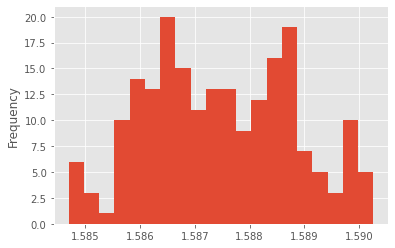

In [92]:
transformations.boxcox.plot(kind = 'hist', bins = 20)

**Transform target**shapiro_wilks

In [84]:
raw_transformations.boxcox_transformation('price')

(array([1.58996238, 1.59013285, 1.5902592 , 1.5898058 , 1.58994502,
        1.58989005, 1.58992554, 1.58973506, 1.58999534, 1.59014376,
        1.58976614, 1.58981841, 1.58988354, 1.59000075, 1.58943648,
        1.58959815, 1.58960224, 1.58977561, 1.58809803, 1.58809803,
        1.58825907, 1.58867011, 1.5888145 , 1.58895457, 1.58912416,
        1.58846342, 1.58850818, 1.58858606, 1.58907768, 1.58909004,
        1.58936846, 1.58847225, 1.58792483, 1.58795296, 1.58799376,
        1.58827427, 1.5883368 , 1.58804061, 1.58816467, 1.5885782 ,
        1.58863155, 1.58865425, 1.58876232, 1.5891704 , 1.58671102,
        1.58714315, 1.5872541 , 1.58759347, 1.58768072, 1.58872857,
        1.58920821, 1.58798892, 1.58808211, 1.58850632, 1.58858024,
        1.58862434, 1.58888605, 1.58922089, 1.5885786 , 1.58880088,
        1.58805908, 1.58839694, 1.58870165, 1.58873354, 1.58887252,
        1.58878582, 1.58880822, 1.58702752, 1.58722493, 1.5887515 ,
        1.58931822, 1.58809728, 1.5885782 , 1.58

In [85]:
import importlib
importlib.reload(src.Features.feature_engineering)
from src.Features.feature_engineering import Tests

In [86]:
raw_tests.shapiro_wilks('price')

Shapiro statistic for price: 0.8006654381752014
P-Value: 1.8491777441833604e-15



In [87]:
#Subset categorical variables to encode
cols = raw_data.select_dtypes(include = 'object').columns

#Check
print(cols)

Index(['fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel',
       'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem'],
      dtype='object')


# Feature Engineering

**Transform target**